# Graph Theory Questions for Jupyter-based Exam

## Instructions
1. You may use any source of information you can find, so long as you don't communicate with anyone else.
2. You can put your answers in the marked cells. If you prefer making multiple answer cells that's also ok, but make sure I know which question you're answering where.
3. You can split up code answers into multiple cells if you like, but keep them in order for me to grade!
3. You get partial points for partial answers. This means you can still get points for coding questions if you explain your reasoning, but don't manage the code itself.
4. You have 120 minutes total for the exam (unless you are eligible for "Special Facilities"), distribute it wisely amongst questions.
5. Remember you can look up the documentation of any function or object by appending "?" (question mark) to it without calling it with "()"; this is the same documentation as you'd look up on the internet! See an example in the next cell.
4. Unless specified otherwise you may assume graphs are simple and undirected.
6. Your final grade will be `score / 70 * 9 + 1`


# -- BEGIN EXAM --
Good luck!
*Don't forget to run the global imports defined in the next cell!!!*

In [1]:
# Global definitions you will need are here; RUN THIS CELL
# Define any extra global modules you want to add yourself here as well!
# As well as any extra helper functions you want to use in all exercises below.
import networkx as nx
import pickle
import random
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Example for how to get documentation from within the notebook
nx.Graph?

Init signature: nx.Graph(incoming_graph_data=None, **attr)
Docstring:     
Base class for undirected graphs.

A Graph stores nodes and edges with optional data, or attributes.

Graphs hold undirected edges.  Self loops are allowed but multiple
(parallel) edges are not.

Nodes can be arbitrary (hashable) Python objects with optional
key/value attributes, except that `None` is not allowed as a node.

Edges are represented as links between nodes with optional
key/value attributes.

Parameters
----------
incoming_graph_data : input graph (optional, default: None)
    Data to initialize graph. If None (default) an empty
    graph is created.  The data can be any format that is supported
    by the to_networkx_graph() function, currently including edge list,
    dict of dicts, dict of lists, NetworkX graph, 2D NumPy array, SciPy
    sparse matrix, or PyGraphviz graph.

attr : keyword arguments, optional (default= no attributes)
    Attributes to add to graph as key=value pairs.

See Also
---

## Question 1 (10pt)

Answer the following questions.

1. What is the definition of an Eulerian cycle?
1. What is the definition of a Hamiltonian cycle?
1. Given a graph consisting of $n$ nodes and $k$ edges, what is the size of the Eulerian cycle of this graph (assuming it exists)?
1. Given a graph consisting of $n$ nodes and $k$ edges, what is the size of the Hamiltonian cycle of this graph (assuming it exists)?
1. What criteria must a graph meet for an Eulerian cycle to exist? And an Eulerian tour?
1. Explain in your own words what the following means, given that the function $d(a, b)$ signifies the length of the  shortest path between nodes $a$ and $b$: $x = \max\limits_{u \in V} \max\limits_{v \in V} d(u, v) $. The quantity $x$ has a name; what is its name?
1. Explain in your own words what the following means, given that the function $d(a, b)$ signifies the length of the  shortest path between nodes $a$ and $b$: $y = \min\limits_{u \in V} \max\limits_{v \in V} d(u, v) $. The quantity $y$ has a name; what is its name?

In [4]:
## Answers to question 1
# 1- Eulerian cycle is a cycle that meet every edge of the cycle once.
# 2- graph cycle through a graph that visits each node exactly once
# 3- k edges and k nodes
# 4- n edges and n nodes
# 5- A connected graph has an Euler cycle if and only if every vertex has even degree.
#    for an eulerian tour all the nodes beside start and end should have even degree. start and end nodes
#    should have odd degree
# 6- the name is diameter: The diameter d of a graph is the maximum eccentricity of any vertex in the graph.
# 7- the name is radius: The radius r of a graph is the minimum eccentricity of any vertex 

## Question 2 (20pt)

1. Take a look at the file "foodwebs.txt". It models the predatory relationships in a marine ecosystem ("who eats whom"). Each line in the file contains at least 2 values, separated by commas. The first value is a "Species", and all other values on the line are "Species they feed on". The latter lists for every species the other species in the table that they eat. (Except for the so-called "primary producers" like the seaweed Kelp which "eat" inorganic resources like sunlight. These have a prey list denoted "-"). For example, "Shark" eats "Sea otter"; and "Sea stars" eats "Abalone", "small herbivorous fishes", and "sea urchins". This web can be modeled as a digraph; the species are in vertices and arcs represent an "eaten by" relationship between two species (from prey to predator). Construct such a digraph by parsing the "foodwebs.txt" comma-separated-file and using the appropriate NetworkX objects. Plot this digraph as well and check that it is weakly connected.
  
  If you don't manage, use the following code snippet to continue. You will then get 0 points on this subquestion, however.
  ```py
  with open('foodweb.pickle', 'rb') as jar:
       digraph = pickle.load(jar)
  ```

2. Ecologists like to understand an ecosystem in terms of trophic levels, that is groups of predators which eat prey of comparable size/type (sometimes also called an ecological "niche"). Let's try to infer these trophic levels automatically from our dataset, using network methods. We can imagine two different methods:

  - The first possible definition of a trophic level of species X is: i. 0 if X is a primary producer in the food web (a species that does not consume any species in the food web). ii. k if the shortest path from a level 0 species to X is of length k.
  - The second possible definition of a trophic level of species X is: i. 0 if X is a primary producer in the food web (a species that does not consume any species in the food web). ii. k if the longest path from a level 0 species to X is of length k.
  
  Implement both these possible definitions as the functions "trophic_short" and "trophic_long" respectively and calculate the trophic level for all species in the foodweb with both functions.

3. Which of the two methods results in trophic levels which best matches the idea of a "trophic level" discussed above, of predators which feast on similar type/size of prey? Provide arguments for your answer!

['sea otter', 'shark', 'sea stars', 'sea urchins', 'large crabs', 'large fishes and octopus', 'abalone', 'small herbivorous fishes', 'sessile invertebrates', 'sea urchins kelp', 'organic debris', 'smaller predatory fishes and invertebrates', 'small herbivorous fishes and invertebrates', 'kelp', 'smaller predatory fishes', 'planktonic invertebrates kelp', 'small (herbivorous) fishes and invertebrates', '-', 'microscopic planktonic algae', 'planktonic invertebrates']
[('sea otter', 'shark'), ('sea stars', 'sea otter'), ('sea stars', 'large crabs'), ('sea urchins', 'sea otter'), ('sea urchins', 'sea stars'), ('large crabs', 'sea otter'), ('large fishes and octopus', 'sea otter'), ('abalone', 'sea otter'), ('abalone', 'sea stars'), ('small herbivorous fishes', 'sea stars'), ('sessile invertebrates', 'sea urchins kelp'), ('sessile invertebrates', 'smaller predatory fishes'), ('organic debris', 'sea urchins kelp'), ('organic debris', 'abalone'), ('organic debris', 'large crabs'), ('smaller p

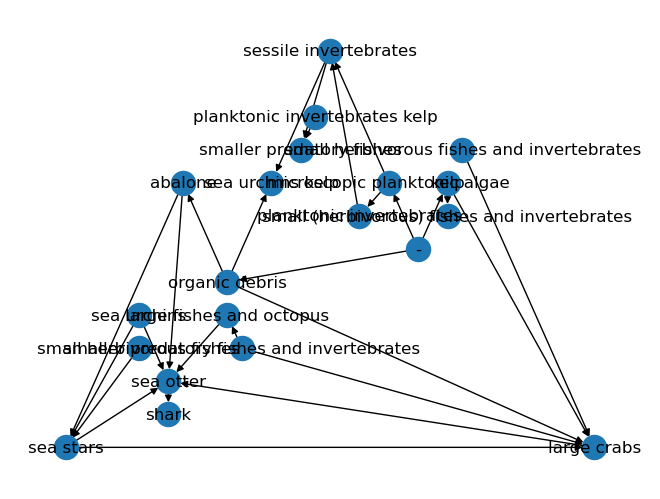

In [2]:
# 1- the source has some problems, so I use the teacher's code here
with open('foodweb.pickle', 'rb') as jar:
    digraph = pickle.load(jar)


print(digraph.nodes)
print(digraph.edges)
print(digraph)
print(nx.is_weakly_connected(digraph))
nx.draw_planar(digraph, with_labels=True)
plt.show()


['sea otter', 'shark', 'sea stars', 'sea urchins', 'large crabs', 'large fishes and octopus', 'abalone', 'small herbivorous fishes', 'sessile invertebrates', 'sea urchins kelp', 'organic debris', 'smaller predatory fishes and invertebrates', 'small herbivorous fishes and invertebrates', 'kelp', 'smaller predatory fishes', 'planktonic invertebrates kelp', 'small (herbivorous) fishes and invertebrates', '-', 'microscopic planktonic algae', 'planktonic invertebrates']
this graph is weakly connected: True


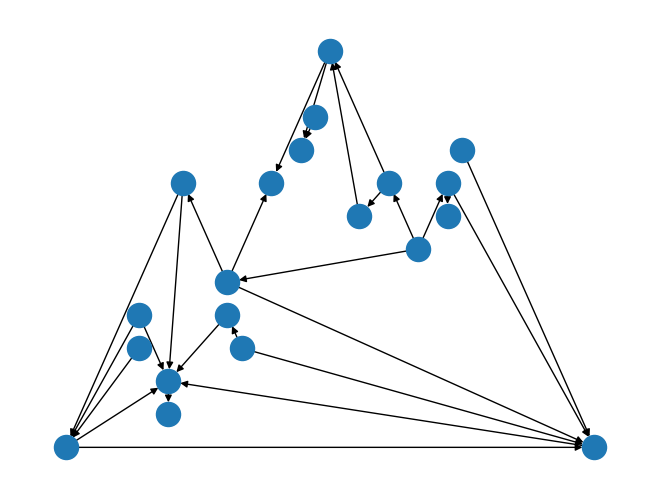

In [13]:
# using with open command to open a file
graph = nx.DiGraph()
with open('foodweb.txt') as file:

    for line in file:
        species = line.split(',')
        predetor = species[0]
        preys = species[1:]
        predetor = predetor.strip().casefold()

        for prey in preys:
            prey = prey.strip().casefold()
            graph.add_edge(prey, predetor)

print(graph.nodes)
weakly_connected = nx.is_weakly_connected(graph)
print(f'this graph is weakly connected: {weakly_connected}')
nx.draw_planar(graph)


In [14]:

in_degree = dict(digraph.in_degree)
zero_prey_list = []

for species in in_degree:
    if in_degree[species] == 0:
        zero_prey_list.append(species)
        print(species)

print('we have multi origins means that we cannot reach to all the points from the origin')



sea urchins
small herbivorous fishes
smaller predatory fishes and invertebrates
small herbivorous fishes and invertebrates
planktonic invertebrates kelp
-
we have multi origins means that we cannot reach to all the points from the origin


## Question 3 (20 pt)

The Davis southern women graph is constructed from data collected by Davis et al. in the 1930s. They tracked the attendence of a number of women to several social clubs.

1. Load the graph in the file "dwcg.gml". This file is in GML format. If you don't manage, use the following snippet to get 0 point at this subquestion: `graph = nx.davis_southern_women_graph()`.
1. What class/type of graph is this? Be as specific as possible
1. How many social clubs are there? How many women?
1. Plot a histogram of the sizes of the clubs, and a histogram of the number of clubs women are part of.
1. Which clubs have the most members in common?

[('Evelyn Jefferson', {'bipartite': 0}), ('Laura Mandeville', {'bipartite': 0}), ('Theresa Anderson', {'bipartite': 0}), ('Brenda Rogers', {'bipartite': 0}), ('Charlotte McDowd', {'bipartite': 0}), ('Frances Anderson', {'bipartite': 0}), ('Eleanor Nye', {'bipartite': 0}), ('Pearl Oglethorpe', {'bipartite': 0}), ('Ruth DeSand', {'bipartite': 0}), ('Verne Sanderson', {'bipartite': 0}), ('Myra Liddel', {'bipartite': 0}), ('Katherina Rogers', {'bipartite': 0}), ('Sylvia Avondale', {'bipartite': 0}), ('Nora Fayette', {'bipartite': 0}), ('Helen Lloyd', {'bipartite': 0}), ('Dorothy Murchison', {'bipartite': 0}), ('Olivia Carleton', {'bipartite': 0}), ('Flora Price', {'bipartite': 0}), ('E1', {'bipartite': 1}), ('E2', {'bipartite': 1}), ('E3', {'bipartite': 1}), ('E4', {'bipartite': 1}), ('E5', {'bipartite': 1}), ('E6', {'bipartite': 1}), ('E7', {'bipartite': 1}), ('E8', {'bipartite': 1}), ('E9', {'bipartite': 1}), ('E10', {'bipartite': 1}), ('E11', {'bipartite': 1}), ('E12', {'bipartite': 1})

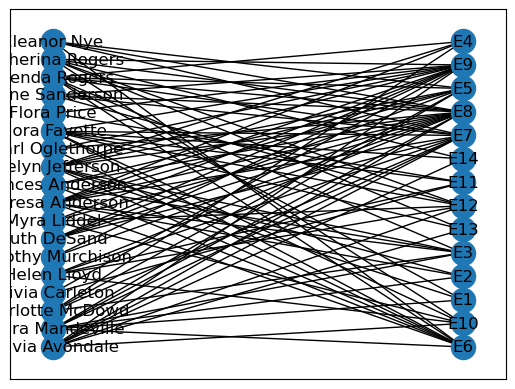

In [ ]:
# 1- loading gml dataset
dwcg_graph = nx.read_gml('dswc.gml')
print(list(dwcg_graph.nodes(data=True)))

# 2- check the properties of the graph
print(f'the graph is bipartite = {nx.is_bipartite(dwcg_graph)}')
print(f'the graph is directed = {nx.is_directed(dwcg_graph)}')
print(f'the graph is connected = {nx.is_connected(dwcg_graph)}')
print(f'the graph is connected, undirected, and most impostantly bipartite')

# 3- make two lists for women and clubs
clubs = [node for node in dwcg_graph if dwcg_graph.nodes[node]['bipartite'] == 1]
women = [node for node in dwcg_graph if dwcg_graph.nodes[node]['bipartite'] == 0]
women_number = len(women)
clubs_number = len(clubs)
print(f'the number of clubs is: {clubs_number}')
print(f'the number of women is: {women_number}')

# sketch the graph (not necessary- maybe in the sebsequent exam)
position = nx.bipartite_layout(dwcg_graph, nodes=women)
nx.draw_networkx(dwcg_graph, pos=position)
plt.show()

{'E1': 3, 'E2': 3, 'E3': 6, 'E4': 4, 'E5': 8, 'E6': 8, 'E7': 10, 'E8': 14, 'E9': 12, 'E10': 5, 'E11': 4, 'E12': 6, 'E13': 3, 'E14': 3}
{'Evelyn Jefferson': 8, 'Laura Mandeville': 7, 'Theresa Anderson': 8, 'Brenda Rogers': 7, 'Charlotte McDowd': 4, 'Frances Anderson': 4, 'Eleanor Nye': 4, 'Pearl Oglethorpe': 3, 'Ruth DeSand': 4, 'Verne Sanderson': 4, 'Myra Liddel': 4, 'Katherina Rogers': 6, 'Sylvia Avondale': 7, 'Nora Fayette': 8, 'Helen Lloyd': 5, 'Dorothy Murchison': 2, 'Olivia Carleton': 2, 'Flora Price': 2}


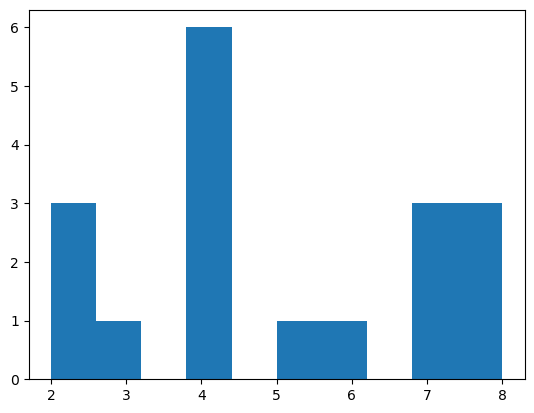

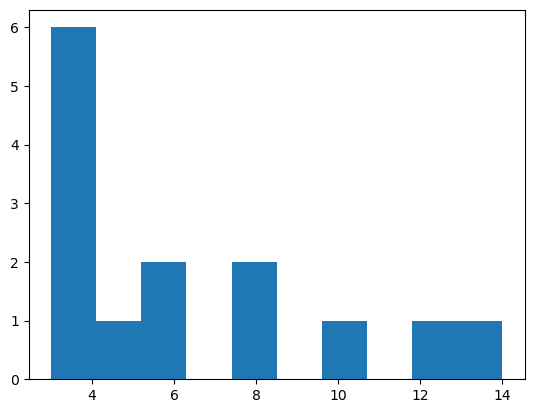

In [ ]:
# 4- make 2 dictionaries for this question
club_dict = {}
women_dict = {}

# find the dictionary of the number of club members
for node in clubs:
    club_dict[node] = len(dwcg_graph[node])

# find the dictionary of the number of membership for each woman
for node in women:
    women_dict[node] = len(dwcg_graph[node])
    
print(club_dict)
print(women_dict)

# plottin the histograms
# women
plt.hist(x= list(women_dict.values()))
plt.show()

# clubs
plt.hist(x= list(club_dict.values()))
plt.show()

In [ ]:
a = [1, 2, 3, 4, 5]
b = [9, 8, 7, 6, 5]
c = set(a) & set(b)
len(c)
list(dwcg_graph['E8'])

['Evelyn Jefferson',
 'Laura Mandeville',
 'Theresa Anderson',
 'Brenda Rogers',
 'Frances Anderson',
 'Eleanor Nye',
 'Pearl Oglethorpe',
 'Ruth DeSand',
 'Verne Sanderson',
 'Myra Liddel',
 'Katherina Rogers',
 'Sylvia Avondale',
 'Helen Lloyd',
 'Dorothy Murchison']

In [ ]:
# 5- find two clubs that have most members in common 

assistant_counter = 0
match_number = 0
match_list = []

# loop through club list
for node1 in clubs:
    neigbors1 = list(dwcg_graph[node1])

    # loop through club list
    for node2 in clubs:
        neigbors2 = list(dwcg_graph[node2])

        # find the number of common members in each pair of clubs
        match_number = len(set(neigbors1) & set(neigbors2))

        # find the largest one
        if match_number > assistant_counter and node1 != node2:
            assistant_counter = match_number
            match_list = [node1, node2]

print(assistant_counter, match_list)


9 ['E8', 'E9']


## Question 4 (20 pt)

Caveman graphs are defined as a graph consisting of $l$ disconnected cliques of size $k$. Networkx has a convenient function for generating these: `nx.caveman_graph`. In this caveman graph there are clear communities: the original cliques used to construct this graph. Finding communities in general is pretty hard, but in this specific case they are so obvious existing algorithms will (should) manage without issue. 

In this question you will investigate the quality of a few different embeddings algorithms using a caveman graph.

1. Write a function that does the following:

  a. Generate a caveman graph with l=5, k=10.
  
  b. Add random edges to the generated graph until the graph is connected and at least 20 edges have been added.

  If you don't manage, use the following snippet to get 0 points for this subquestion.
```py
    with open('caveman.pickle', 'rb') as jar:
        caveman_graph = pickle.load(jar)
```

2. Browse through the networkx documentation until you find an appropriate function to find the communities in your connected caveman graph. Make sure you find 5 communities of 10 nodes each. If you don't manage, use the following 5 communities: `{0-9}, {10-19}, {20-29}, {30-39}, {40-49}`.

3. In your own words, what is graph embedding? What are desirable properties for an embedding?

4. Embed your caveman graph. Use an existing networkx function.

5. Given the communities you found in 2., and the embedding you generated in 4., calculate for each community the average Euclidean distance between nodes within each community, and compare that to the Euclidean distances between communities. Note: For this question you do *not* need the distance in the graph (i.e. the number of edges between nodes), but the Euclidean distance in your embedding.
6. Is the embedding method you chose any good? Compare it with 2 other embedding methods. Does it matter in how many dimensions you embed the graph?


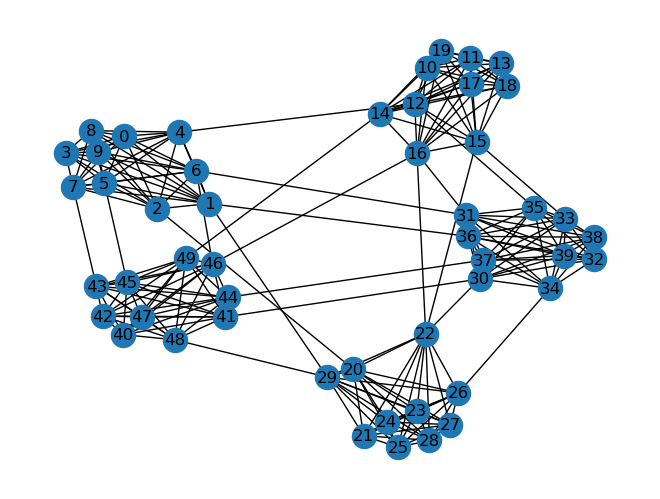

In [ ]:
# 1- for this question first I will make a function to generate a caveman graph

def making_graph():

    # make a caveman graph without connection
    new_edge_counter = 0
    g = nx.caveman_graph(l=5, k=10)

    # find the list of clques 
    node_list = list(nx.connected_components(g))

    # add edges until the graph become connected or the number of edges reach 20
    while nx.is_connected(g) == False or new_edge_counter < 20:
        # making random condidates for new edges
        clique1 = random.choice(node_list)
        node1 = random.choice(list(clique1))
        clique2 = random.choice(node_list)
        node2 = random.choice(list(clique2))

        # add edges if the cliques are not the same and we do not have that edge
        if clique1 != clique2 and (node1,node2) not in g.edges:
            g.add_edge(node1, node2)
            new_edge_counter += 1
    
    return g

g = making_graph() 

nx.draw_spring(g, with_labels= True)

In [ ]:
# 2- to find the communities in this specific graph one should find the cliques

communities = list(nx.community.louvain_communities(g))
print(f'the number of communities: {len(communities)}')
print(f'communities: {communities}')

the number of communities: 5
communities: [{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}, {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}]


In [ ]:
# 3-  graph embedding is the way that we present our graph, which is an abstract concept. 
#     and, graph embedding is assigning coordinates to each node in a graph.
#     we can use circle and line to present our graph or even a map. 
# properties: 1- all nodes should be as far as possible from each other
#             2- connected nodes should be closer
#             3- (ideally) no cross section

{0: array([-0.42019192, -0.96382872]), 1: array([-0.23721701, -0.52531341]), 2: array([-0.35212184, -0.517683  ]), 3: array([-0.29538487, -1.        ]), 4: array([-0.04851653, -0.68375596]), 5: array([-0.49159072, -0.7238462 ]), 6: array([-0.22905181, -0.6911119 ]), 7: array([-0.49804175, -0.81531954]), 8: array([-0.21468093, -0.92981046]), 9: array([-0.3402076 , -0.89061248]), 10: array([0.89696135, 0.48443955]), 11: array([0.92756247, 0.25081159]), 12: array([0.6876554 , 0.08254018]), 13: array([0.98455067, 0.33438841]), 14: array([0.52744045, 0.37294275]), 15: array([0.67745653, 0.38729071]), 16: array([0.50000436, 0.25631297]), 17: array([0.98931511, 0.44281207]), 18: array([0.82644921, 0.54165299]), 19: array([0.8478532 , 0.36259208]), 20: array([-0.21747103,  0.53239903]), 21: array([-0.33560882,  0.87356605]), 22: array([0.07612676, 0.6233564 ]), 23: array([-0.05101871,  0.94280085]), 24: array([-0.27283259,  0.96284151]), 25: array([-0.13350902,  0.878931  ]), 26: array([-0.044

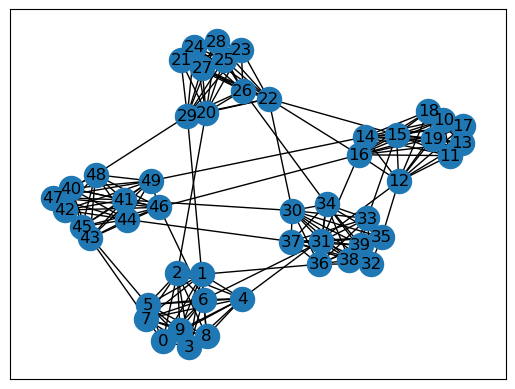

In [ ]:
# 4- embed my graph
# the best choice for the embedding layout of caveman graph is spring layout
embedding = nx.spring_layout(g)
print(embedding)
nx.draw_networkx(g, pos=embedding)

In [ ]:
# 5- to find the elucidean distance we can sum over all the distance in each clique, then make an avarage

elucidean_distance = []

# loop over communities
for community in communities:
    elucidian = []

    # loop over the nodes in each community
    for node1 in community:
        for node2 in community:

            if node2 == node1:
                continue
            
            # calculate each edge magnitude and add it to a list
            array = (embedding[node1] - embedding[node2])**2
            magnitude_edge = sqrt(array[0] + array[1])
            elucidian.append(magnitude_edge) 
    
    # add to the list of elucidean distances for this graph
    elucidean_distance.append((np.average(elucidian)) / 2.0)

print(f'elucidean distance in each community:\n{elucidean_distance}')

# elucidean distances between nodes of the communities
distance_communities = []

# loop over communities
for community1 in communities:
    distance = []
    for community2 in communities:

        # if communities are alike pass
        if community1 == community2:
            continue
        
        # for nodes in different communities find the distance and add to a list
        for node1 in community1:
            for node2 in community2:
                array = (embedding[node1] - embedding[node2])**2
                magnitude_edge = sqrt(array[0] + array[1])
                distance.append(magnitude_edge)
                
    # make an avarage of them and append it to a final list
    distance_communities.append(np.average(distance))
               
print(f'elucidean distance between communities:\n{distance_communities}')

            

elucidean distance in each community:
[0.1459021232532803, 0.143839236071555, 0.14503932670734132, 0.13719654234071219, 0.14301631891330216]
elucidean distance between communities:
[1.2216513440630314, 1.249305517393154, 1.2262124333474556, 1.0118673577464379, 1.1440940570091898]


In [ ]:
# 6- there are different layout that can be used to embed a graph. for example bipartite layout or planar layout
# non of them can be used here. the former cannot be used as this graph is not bipartite and the latter cannot be used as 
# this graph has some edges that cross over each other.
# YES OFCOURSE, the number of dimension that one uses to embed a graph is really matter. Because if we have more than 2 dimension for
# example 3 dimensions one can embed a graph without cross overs.

# --- END OF EXAM ---
Congrats, you made it to the end of the exam! Don't forget to rename your ipynb to "GTReReExamSept_YOUR_NAME_STUDENTNR.ipynb" and hand it in via BlackBoard submit!